In [43]:
"""
Project: Seattle and Boston AirBNB Data Analysis
"""

# Load libraries
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [23]:
# Read csv files for both Seattle and Boston
boston_calendar_df = pd.read_csv(r'D:\GitHub\Seattle-and-Boston-AirBNB-Data-Analysis\data\boston-calendar.csv')
boston_listings_df = pd.read_csv(r'D:\GitHub\Seattle-and-Boston-AirBNB-Data-Analysis\data\boston-listings.csv')
boston_reviews_df = pd.read_csv(r'D:\GitHub\Seattle-and-Boston-AirBNB-Data-Analysis\data\boston-reviews.csv')
seattle_calendar_df = pd.read_csv(r'D:\GitHub\Seattle-and-Boston-AirBNB-Data-Analysis\data\seattle-calendar.csv')
seattle_listings_df = pd.read_csv(r'D:\GitHub\Seattle-and-Boston-AirBNB-Data-Analysis\data\seattle-listings.csv')
seattle_reviews_df = pd.read_csv(r'D:\GitHub\Seattle-and-Boston-AirBNB-Data-Analysis\data\seattle-reviews.csv')

In [24]:
# Print dataframes' shapes
print("boston_calendar_df's shape: {}".format(boston_calendar_df.shape))
print("boston_listings_df's shape: {}".format(boston_listings_df.shape))
print("boston_reviews_df's shape: {}".format(boston_reviews_df.shape))
print("seattle_calendar_df's shape: {}".format(seattle_calendar_df.shape))
print("seattle_listings_df's shape: {}".format(seattle_listings_df.shape))
print("seattle_reviews_df's shape: {}".format(seattle_reviews_df.shape))

boston_calendar_df's shape: (1308890, 4)
boston_listings_df's shape: (3585, 95)
boston_reviews_df's shape: (68275, 6)
seattle_calendar_df's shape: (1393570, 4)
seattle_listings_df's shape: (3818, 92)
seattle_reviews_df's shape: (84849, 6)


In [25]:
boston_calendar_df.fillna('', inplace=True)
boston_reviews_df.fillna('', inplace=True)
boston_listings_df.fillna('', inplace=True)

seattle_calendar_df.fillna('', inplace=True)
seattle_reviews_df.fillna('', inplace=True)
seattle_listings_df.fillna('', inplace=True)

In [26]:
boston_calendar_df['listing_id'] = boston_calendar_df['listing_id'].astype('uint16')

boston_reviews_df.rename(columns={"date":"review_date", "comments":"review_comments"}, inplace=True)

boston_listings_df.rename(columns={"name":"house_name"}, inplace=True)
boston_listings_df['number_of_reviews'] = boston_listings_df['number_of_reviews'].astype('uint8')
boston_listings_df['availability_365'] = boston_listings_df['availability_365'].astype('uint8')
boston_listings_df['review_scores_rating'] = pd.to_numeric(boston_listings_df['review_scores_rating'], errors='coerce')
boston_listings_df.rename(columns={'price':'price($)'}, inplace=True)
boston_listings_df['price($)'] = boston_listings_df['price($)'].map(lambda x: x.lstrip('$'))
boston_listings_df['price($)'] = pd.to_numeric(boston_listings_df['price($)'], errors='coerce')



seattle_calendar_df['listing_id'] = seattle_calendar_df['listing_id'].astype('uint16')

seattle_reviews_df.rename(columns={"date":"review_date", "comments":"review_comments"}, inplace=True)

seattle_listings_df.rename(columns={"name":"house_name"}, inplace=True)
seattle_listings_df['number_of_reviews'] = seattle_listings_df['number_of_reviews'].astype('uint8')
seattle_listings_df['availability_365'] = seattle_listings_df['availability_365'].astype('uint8')
seattle_listings_df['review_scores_rating'] = pd.to_numeric(seattle_listings_df['review_scores_rating'], errors='coerce')
seattle_listings_df.rename(columns={'price':'price($)'}, inplace=True)
seattle_listings_df['price($)'] = seattle_listings_df['price($)'].map(lambda x: x.lstrip('$'))
seattle_listings_df['price($)'] = pd.to_numeric(seattle_listings_df['price($)'], errors='coerce')

In [27]:
boston_calendar_df = boston_calendar_df[[
          "listing_id"
]]

boston_reviews_df = boston_reviews_df[[
          "listing_id"
        , "review_comments"
]]

boston_listings_df = boston_listings_df[[
        "id"
      , "smart_location"
      , "price($)"
      , "availability_365"
      , "number_of_reviews"
      , "review_scores_rating"
      , "house_name"
      , "description"
      , "neighborhood_overview"
      , "host_verifications"
      , "latitude"
      , "longitude"
      , "property_type"
      , "room_type"
]]

boston_combined_df = boston_calendar_df.merge(boston_listings_df, how="left", left_on="listing_id", right_on="id")
boston_combined_df.drop(['id'], axis=1, inplace=True)

boston_combined_df = boston_combined_df.merge(boston_reviews_df, how="left", on="listing_id")

In [28]:
seattle_calendar_df = seattle_calendar_df[[
          "listing_id"
]]

seattle_reviews_df = seattle_reviews_df[[
          "listing_id"
        , "review_comments"
]]

seattle_listings_df = seattle_listings_df[[
        "id"
      , "smart_location"
      , "price($)"
      , "availability_365"
      , "number_of_reviews"
      , "review_scores_rating"
      , "house_name"
      , "description"
      , "neighborhood_overview"
      , "host_verifications"
      , "latitude"
      , "longitude"
      , "property_type"
      , "room_type"
]]

seattle_combined_df = seattle_calendar_df.merge(seattle_listings_df, how="left", left_on="listing_id", right_on="id")
seattle_combined_df.drop(['id'], axis=1, inplace=True)

seattle_combined_df = seattle_combined_df.merge(seattle_reviews_df, how="left", on="listing_id")

In [29]:
boston_combined_df.shape

(2322130, 15)

In [30]:
seattle_combined_df.shape

(2851745, 15)

In [31]:
boston_combined_df.dropna(inplace=True)
seattle_combined_df.dropna(inplace=True)

In [32]:
boston_combined_df.shape

(1036965, 15)

In [33]:
seattle_combined_df.shape

(1477155, 15)

In [34]:
all_combined_df = boston_combined_df.append(seattle_combined_df)
all_combined_df.shape

(2514120, 15)

In [35]:
all_combined_df.head()

,listing_id,smart_location,price($),availability_365,number_of_reviews,review_scores_rating,house_name,description,neighborhood_overview,host_verifications,latitude,longitude,property_type,room_type,review_comments
730,6976,"Boston, MA",65.0,63.0,41.0,98.0,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...",The LOCATION: Roslindale is a safe and diverse...,"['email', 'phone', 'reviews', 'jumio']",42.292438,-71.135765,Apartment,Private room,"A Wonderful, pleasant, and charming host. The..."
731,6976,"Boston, MA",65.0,63.0,41.0,98.0,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...",The LOCATION: Roslindale is a safe and diverse...,"['email', 'phone', 'reviews', 'jumio']",42.292438,-71.135765,Apartment,Private room,Firstly Phil is a great host! He's very helpfu...
732,6976,"Boston, MA",65.0,63.0,41.0,98.0,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...",The LOCATION: Roslindale is a safe and diverse...,"['email', 'phone', 'reviews', 'jumio']",42.292438,-71.135765,Apartment,Private room,Phil was a great host and his home was very co...
733,6976,"Boston, MA",65.0,63.0,41.0,98.0,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...",The LOCATION: Roslindale is a safe and diverse...,"['email', 'phone', 'reviews', 'jumio']",42.292438,-71.135765,Apartment,Private room,Phil is a very friendly host and I felt safe a...
734,6976,"Boston, MA",65.0,63.0,41.0,98.0,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...",The LOCATION: Roslindale is a safe and diverse...,"['email', 'phone', 'reviews', 'jumio']",42.292438,-71.135765,Apartment,Private room,"Firstly, the room itself was very comfortable ..."


In [36]:
all_combined_df['price($)'].unique()

array([ 65., 185.,  95., 725., 375., 250., 145.,  75., 195., 229., 279.,
       135., 225., 289., 209., 251., 389., 342., 359., 165., 299., 399.,
       451., 285., 329.,  70., 295., 125., 235., 249., 270., 200., 175.,
       349., 150., 154., 309.,  99., 259., 155.,  55., 126.,  40., 100.,
        80., 115.,  89.,  79.,  59.,  90., 310., 120.,  60., 107., 220.,
       186., 147., 187., 215.,  48., 137., 109.,  86.,  85., 119., 360.,
       199.,  82., 275.,  97.])

In [37]:
all_combined_df['room_type'].value_counts()

Entire home/apt    1501245
Private room       1012875
Name: room_type, dtype: int64

# 1) Correlation between Rating Score and Availability

In [38]:
pdf_corr = all_combined_df[['price($)', 'availability_365', 'number_of_reviews', 'review_scores_rating']]
pdf_corr.corr()

,price($),availability_365,number_of_reviews,review_scores_rating
price($),1.000000,0.054848,-0.259634,-0.070692
availability_365,0.054848,1.000000,-0.054283,-0.147318
number_of_reviews,-0.259634,-0.054283,1.000000,0.149649
review_scores_rating,-0.070692,-0.147318,0.149649,1.000000


# 2) Word Cloud for Review Comments

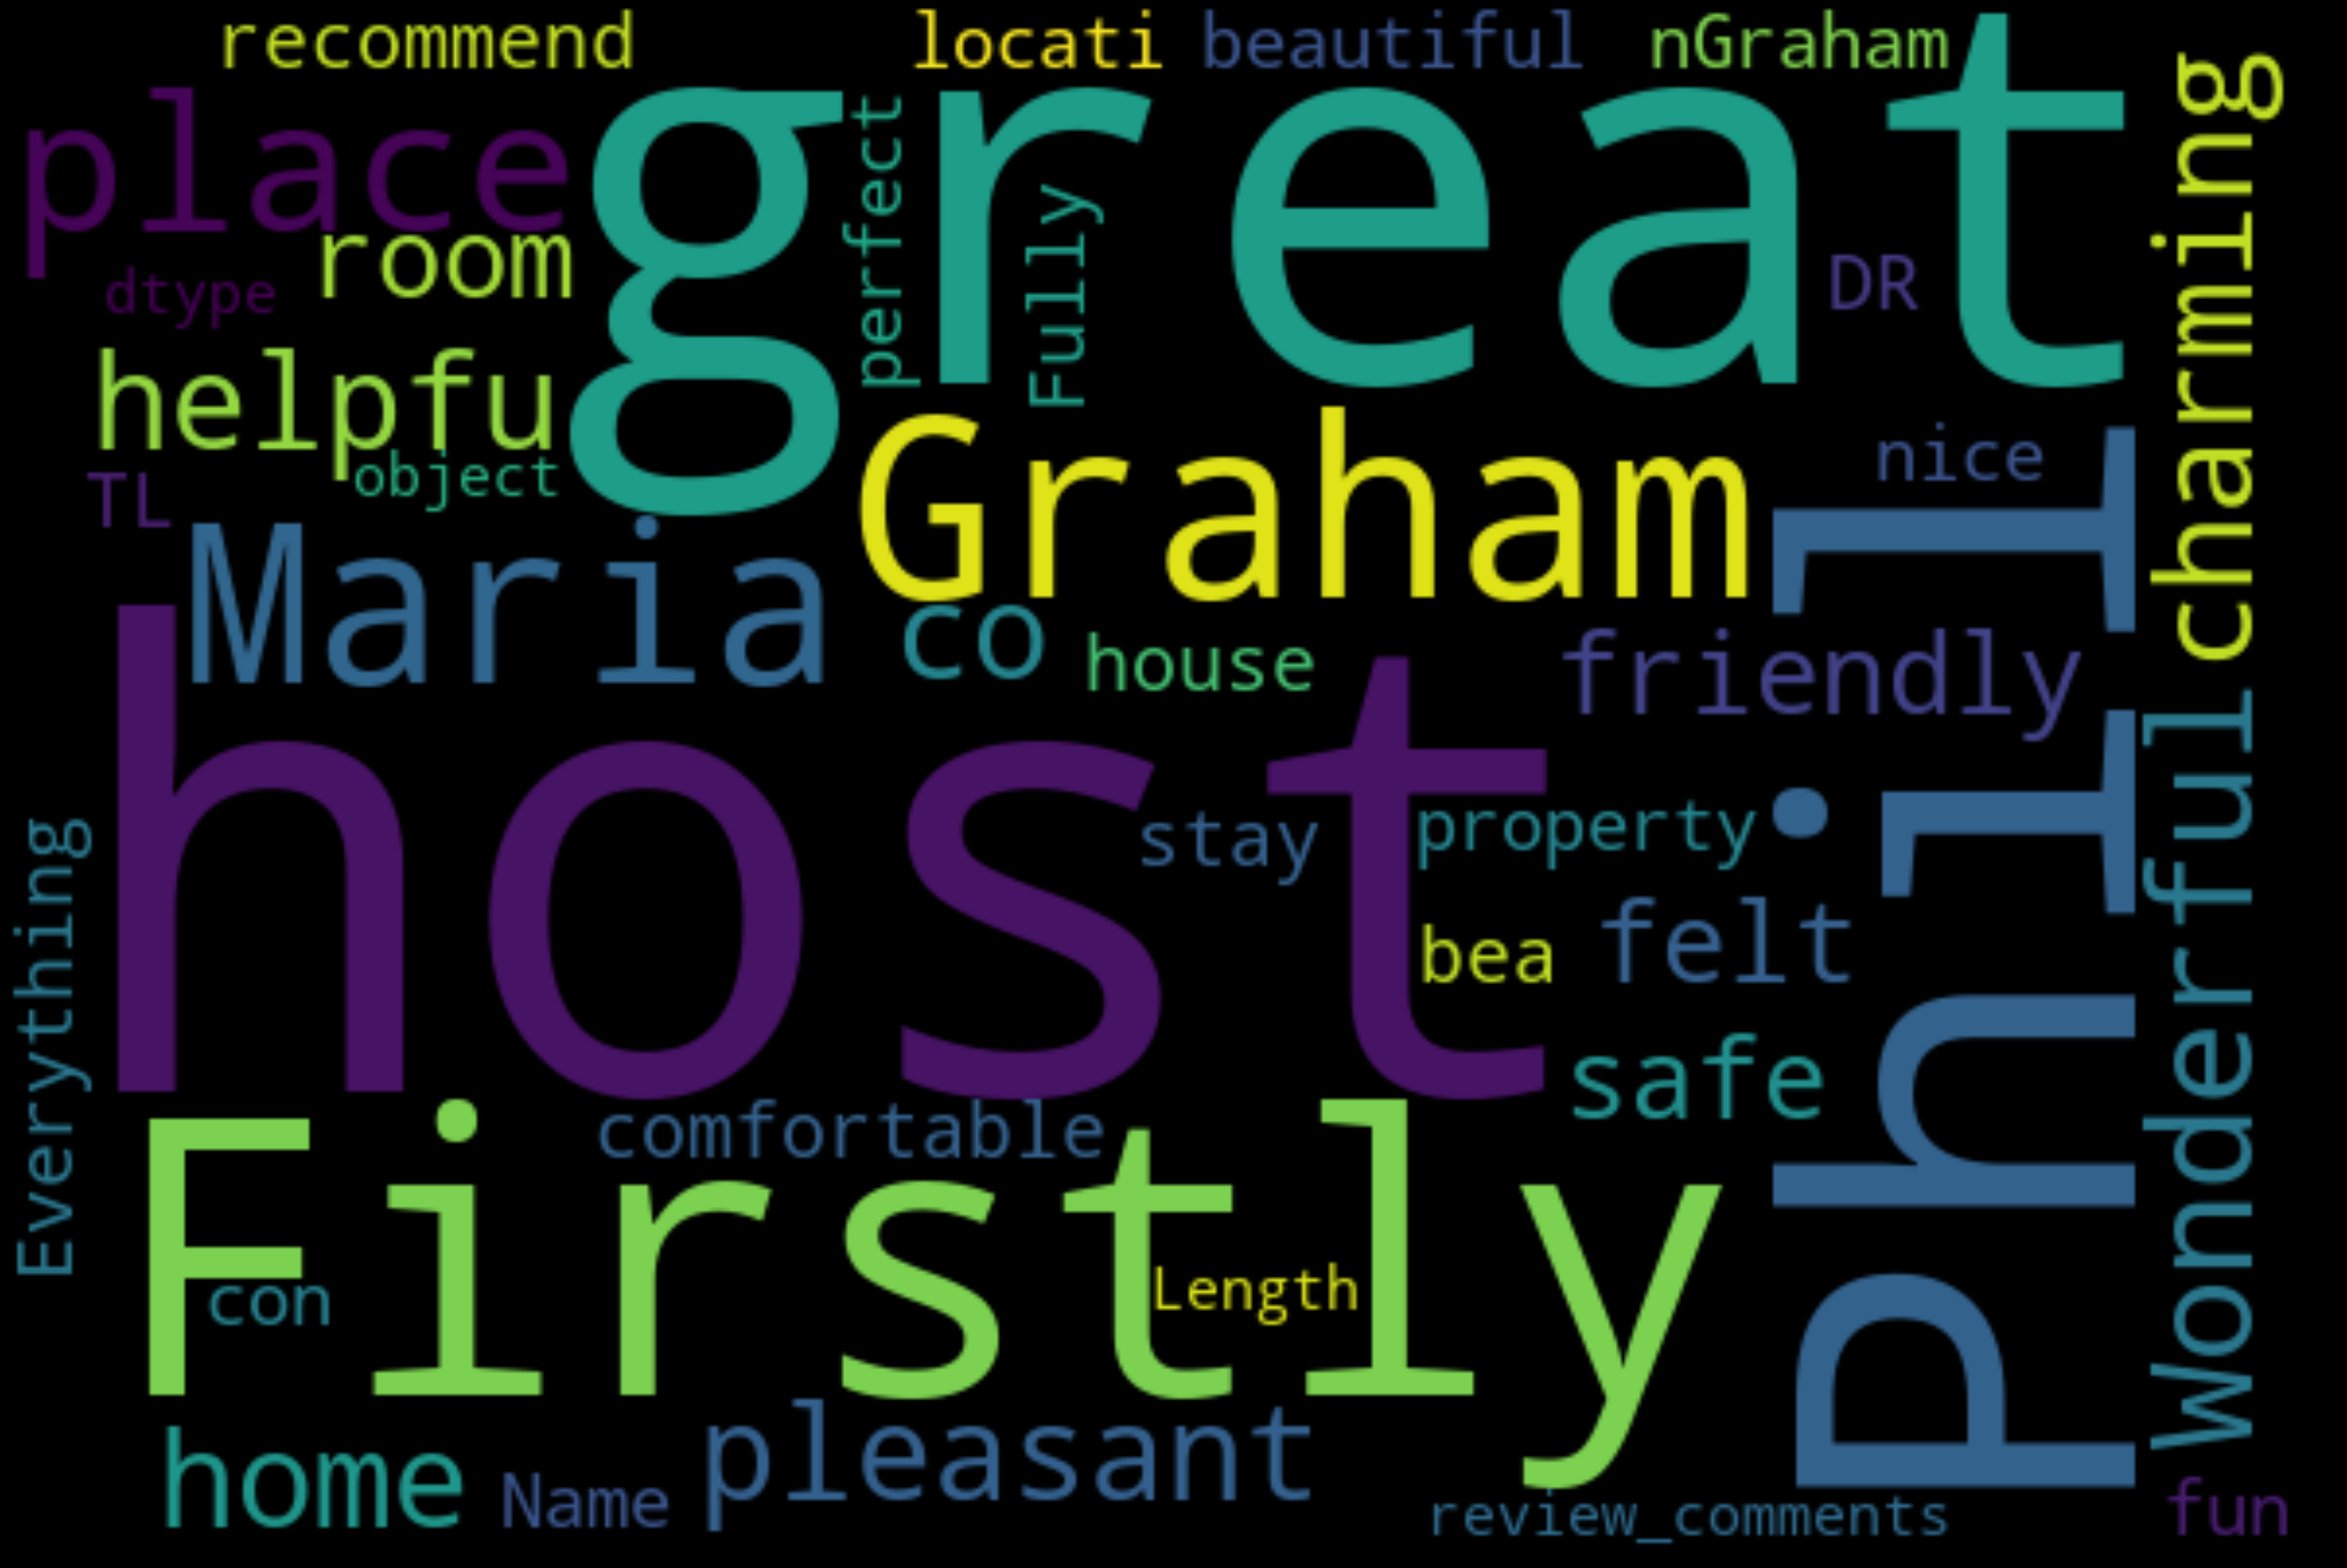

In [46]:
tmp_all_combined_df = all_combined_df.iloc[:1000, :]

wordcloud = WordCloud(
    width = 600,
    height = 400,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(all_combined_df['review_comments']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# 3) Low price houses vs. number of reviews and ratings. Are there more reviews and lower ratings for low-priced houses/flats? or vice-versa?